In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

In [2]:
salaries=pd.read_csv('../data/salaries_data.csv', encoding ='latin')
testeo=pd.read_csv('../data/testeo.csv',encoding='latin')

### Define variable y and remove it from the DF

In [3]:
y=salaries['salary_in_usd']

In [4]:
salaries2=salaries.drop(columns=['salary_in_usd'])

In [5]:
salaries2.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
495,2022,SE,FT,Data Engineer,100000,USD,US,100,US,M
496,2021,EN,FT,Big Data Engineer,435000,INR,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,USD,CA,100,CA,M
498,2021,MI,FT,Data Engineer,60000,GBP,GB,100,GB,L
499,2021,EN,FT,Computer Vision Software Engineer,70000,USD,US,100,US,M


In [6]:
salaries2.shape

(500, 10)

### Concatenate salaries and testeo to apply changes to both at the same time

In [7]:
salaries3= pd.concat([salaries2,testeo])

salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


#### Drop salary and salary currency because it tricks the model and the error

In [8]:
salaries3=salaries3.drop(columns=['salary','salary_currency'])

In [9]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(2), object(6)
memory usage: 42.7+ KB


In [10]:
salaries3.shape

(607, 8)

In [11]:
salaries3=salaries3.reset_index().drop('index', axis=1)

In [12]:
salaries3.tail()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Analyst,US,100,US,M
603,2022,SE,FT,Data Architect,US,100,US,M
604,2022,SE,FT,Data Scientist,US,100,US,M
605,2022,EN,FT,Data Analyst,CA,0,CA,M
606,2022,SE,FT,Data Analyst,US,0,US,M


### Examinate the columns and data

In [13]:
salaries3.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
BI Data Analyst                               6
ML Engineer                                   6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [14]:
#pd.set_option('display.max_rows', 500)
#salaries3.groupby(['company_location', 'job_title']).agg({'salary':['mean','max','min','count']})

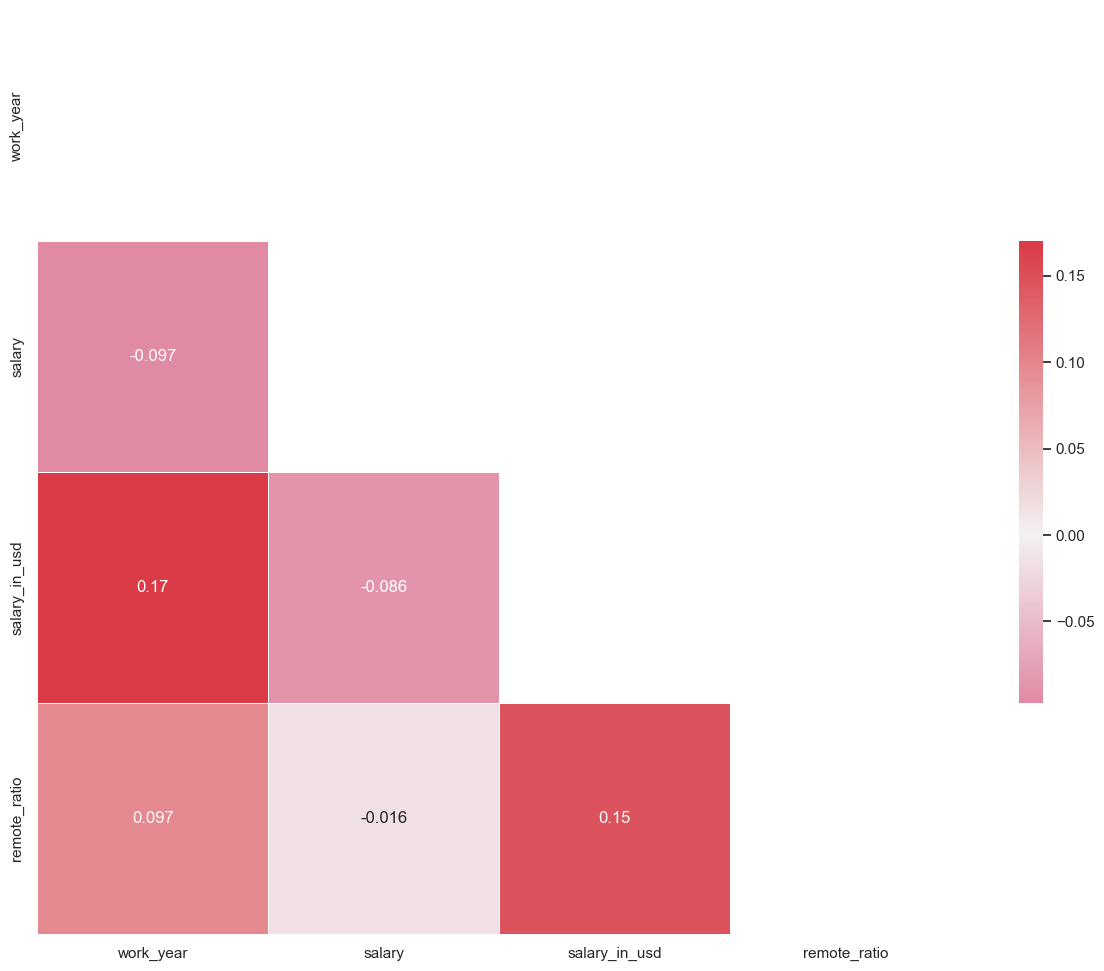

In [15]:
# buscando colinealidad

plt.figure(figsize=(15,12))

sns.set(style='white')

mask=np.triu(np.ones_like(salaries.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salaries.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [16]:
salaries3.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
for c in salaries3.columns:       #valores unicos de cada columna
    
    columna=c
    
    print(c,'- valores únicos: ',len(salaries3[columna].unique()))

work_year - valores únicos:  3
experience_level - valores únicos:  4
employment_type - valores únicos:  4
job_title - valores únicos:  50
employee_residence - valores únicos:  57
remote_ratio - valores únicos:  3
company_location - valores únicos:  50
company_size - valores únicos:  3


In [18]:
salaries3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
dtypes: int64(2), object(6)
memory usage: 38.1+ KB


### Apply GET DUMMIES to all the object columns

In [19]:
salaries3=pd.get_dummies(salaries3, columns=['experience_level','employment_type','job_title','company_location','company_size','employee_residence'], drop_first=True)
salaries3.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
0,2022,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2021,100,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2021,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2021,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Apply StandarScaler to normalize the data

In [20]:
from sklearn.preprocessing import StandardScaler
ss=pd.DataFrame(StandardScaler().fit_transform(salaries3._get_numeric_data()),  # standardize numeric columns
         columns=salaries3._get_numeric_data().columns)

In [21]:
ss.tail()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
602,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
603,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
604,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
605,0.859977,-1.743615,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
606,0.859977,-1.743615,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476


### Split the DF after the transformations to Salaries and Testeo 

In [22]:
salaries_nor=ss[0:500]
salaries_nor.tail()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
495,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
496,-0.586023,-1.743615,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
497,0.859977,0.714862,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
498,-0.586023,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
499,-0.586023,0.714862,-0.211543,-0.735261,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476


In [23]:
salaries_nor.to_csv('../data/salaries_nor.csv')

In [24]:
testeo_nor=ss[500:]
testeo_nor
testeo_nor=testeo_nor.reset_index().drop('index', axis=1)
testeo_nor.head()


,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN
0,-2.032024,-1.743615,-0.211543,-0.735261,1.080674,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
1,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
2,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,0.910117,-0.070476
3,-2.032024,-1.743615,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476
4,-2.032024,0.714862,-0.211543,1.360061,-0.925348,-0.081446,0.179758,-0.129423,-0.108012,-0.081446,...,-0.057496,-0.040622,-0.081446,-0.057496,-0.057496,-0.040622,-0.070476,-0.040622,-1.098760,-0.070476


In [25]:
testeo_nor.to_csv('../data/testeo_nor.csv')

In [26]:
X=salaries_nor

In [27]:
X.shape, y.shape

((500, 164), (500,))

### Preparation for testing

In [28]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse  

X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 164), (100, 164), (400,), (100,))

In [29]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 164), (100, 164), (400,), (100,))

### Models evaluation

In [30]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [31]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 90%|██████████████████████████████████████▌    | 26/29 [01:36<00:02,  1.18it/s]

[18:20:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████| 29/29 [01:55<00:00,  4.00s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.03,0.03,None,0.02,0.73
NearestCentroid,0.03,0.03,None,0.03,0.05
LogisticRegression,0.02,0.02,None,0.02,1.36
BernoulliNB,0.02,0.02,None,0.01,0.04
SVC,0.02,0.02,None,0.01,0.31
GaussianNB,0.02,0.02,None,0.02,0.07
RandomForestClassifier,0.02,0.02,None,0.02,0.47
AdaBoostClassifier,0.03,0.01,None,0.00,0.43
XGBClassifier,0.01,0.01,None,0.01,14.21


In [32]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 42/42 [00:12<00:00,  3.35it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,330335966436887071263637182204608512.00,-216887250690885461636844172913672192.00,29131419612685499629568.00,0.09
RANSACRegressor,19388455967361666786944614400.00,-12729794322005135580962226176.00,7057572211731708928.00,0.85
TransformedTargetRegressor,776465217399442943772721152.00,-509800395262260512391430144.00,1412357761870555136.00,0.04
LinearRegression,776465217399442943772721152.00,-509800395262260512391430144.00,1412357761870555136.00,0.06
MLPRegressor,7.20,-3.07,126204.70,1.27
LinearSVR,7.19,-3.06,126076.52,0.04
KernelRidge,6.90,-2.88,123165.63,0.03
GaussianProcessRegressor,3.97,-0.95,87405.18,0.10
SVR,2.55,-0.02,63061.78,0.07


### Applying LGBMRegressor

In [33]:
import lightgbm as ltb

In [34]:
model = ltb.LGBMRegressor()

In [35]:
model.fit(X_train, y_train)

LGBMRegressor()

In [36]:
y_pred=model.predict(X_test)

In [37]:
mse(y_test, y_pred, squared=False)

50840.74034464036

In [38]:
y_predOK=model.predict(testeo_nor)

In [39]:
pruebaOK = pd.DataFrame(y_predOK, columns = ['salary_in_usd'])
pruebaOK

,salary_in_usd
0,87638.37
1,195557.49
2,89294.66
3,53825.82
4,48017.23
...,...
102,107417.49
103,172379.42
104,160146.13
105,63059.31


In [40]:
#pruebaOK.to_csv('../data/pruebaOK.csv',index_label='id')

### Applying RFR model

In [41]:
rfr=RFR()

rfr.fit(X_train, y_train)

y_pred=rfr.predict(X_test)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)


0.8624954056585692 0.381423934552514


In [42]:
y_pred=rfr.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error as mse  

In [44]:
mse(y_test, y_pred, squared=False)

49197.29140663909

#### Test it vs the Testeo

In [45]:
y_pred1=rfr.predict(testeo_nor)

In [46]:
y_pred1

array([ 95733.539     , 119090.69444444, 104322.        ,  59220.97      ,
        26484.73      ,  76199.74      ,  75915.54      ,  38546.37      ,
        43343.3025    , 150171.49415584,  33536.961     , 147304.09047619,
        51483.74      ,  29141.93      ,  75602.24      ,  54451.192     ,
        72387.81      , 143569.90262515,  46161.98333333,  56017.84333333,
        53307.025     ,  58737.96542857,  69499.55      , 163417.84692161,
        17034.06      ,  30727.611     ,  84307.86666667, 207234.02857143,
        53345.26333333,  98094.15      ,  93034.23      , 116578.72222222,
        93978.83      ,  60367.252     ,  40091.635     ,  74468.365     ,
       163417.84692161,  28695.6475    ,  67075.93666667, 169377.80952381,
        26901.466     ,  16859.3       , 111467.        , 164422.36136364,
        88231.66666667, 247564.80952381, 118361.95955764,  63678.74166667,
       116578.72222222,  35192.5       , 111027.17748918,  51250.85      ,
       120560.67011111, 1

#### Create a DF from an array

In [47]:
prueba = pd.DataFrame(y_pred1, columns = ['salary_in_usd'])
prueba

,salary_in_usd
0,95733.54
1,119090.69
2,104322.00
3,59220.97
4,26484.73
...,...
102,108025.90
103,234861.20
104,161321.75
105,65467.08


In [48]:
#prueba.to_csv('../data/prueba.csv',index_label='id')

### Apply SVC method

In [49]:
from sklearn.svm import SVC

svc=SVC(probability=True)

svc.fit(X_train, y_train)

y_prob=svc.predict_proba(X_test)

train_score=svc.score(X_train, y_train)    # R2
test_score=svc.score(X_test, y_test)


In [50]:
mse(y_test, y_pred, squared=False)

49197.29140663909

In [51]:
y_pred2=svc.predict(testeo_nor)

In [52]:
prueba2 = pd.DataFrame(y_pred2, columns = ['salary_in_usd'])
prueba2

,salary_in_usd
0,100000
1,170000
2,135000
3,100000
4,100000
...,...
102,140000
103,150000
104,140000
105,135000


In [53]:
prueba2.to_csv('../data/prueba2.csv',index_label='id')